# Gradient Descent

In the first part of the notebook, we will talk about the key concepts and the math behind the GD approach. Afterwards, there will be the simple [implementation](#implementation) part, where the GD will be used to solve a classification problem.

## Theoretical Aspects

The idea behind the Gradient Descent approach is to try to minimize the in-sample error $E_{\text{IN}}$ of a hypothesis $h(x)$ with the objective that the out-sample error $E_{\text{OUT}}$ will be minimized too. Let's define the $E_{\text{IN}}$ as the Sum of Squared Errors (also called by its acronym $SSE$):
$$
    E_{\text{IN}}(h) =  \frac{1}{N}\sum_{i = 0}^N \left[ f(X_i) - h(X_i) \right]^2
$$

In the GD approach, we are changing the __activation function__ $\Phi$. The activation function is that function whose output lets the algorithm know if there is an error or not. In the perceptron, the activation function was the sign function; here we use the identity function as follows:
$$
h(X_i) = \Phi(X_i) = w^TX_i
$$
Meaning that now the error function can be rewritten as follows:
$$
    E_{\text{IN}}(w) =  \frac{1}{N}\sum_{i = 0}^N \left[ y_i - w^TX_i \right]^2
$$
Now the question follows: in order to minimize the error function $E_{\text{IN}}(w)$, how shall we chose the optimal weight $w$? Let's hypothesize that the error function $E_{\text{IN}}(w)$ is a parabola, like the plot shown below. How can we be sure that we are approaching the absolute minimum? We can use the first derivative of a function, called __gradient__ for  $>1$-variable function.

By observing the parabola, in the points $E_{\text{IN}}(w_1)$ and $E_{\text{IN}}(w_2)$, we can see that the derivative of $E_{\text{IN}}(w)$ is computed. In the case of $w_1$, to reach the minimum, is necessary to add something meanwhile in the case of $w_2$, something shall be subtracted.

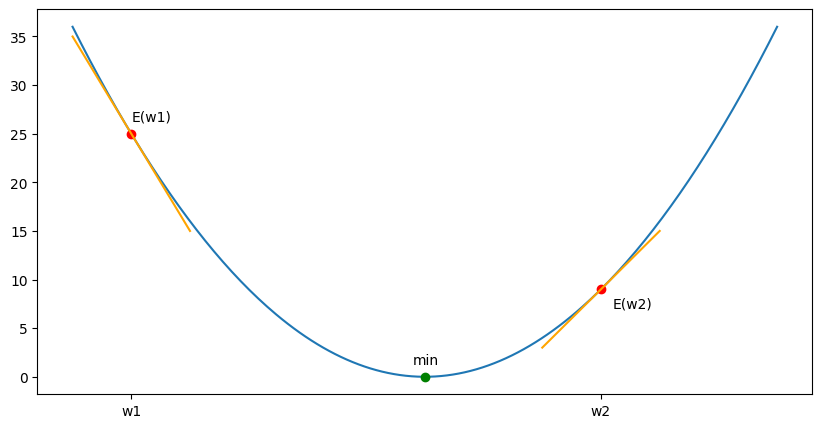

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# create data
x = np.linspace(-6, 6, 240)
y = x**2

# plot parabola
plt.figure(figsize=(10, 5))
plt.plot(x, y)

# insert fixed points
plt.xticks([-5, 3], ['w1', 'w2'])
plt.plot([-5, 3], [25, 9], 'ro')

# label points in the curve
plt.text(-5, 26, 'E(w1)', ha='left', va='bottom')
plt.text(3.2, 6.8, 'E(w2)', ha='left', va='bottom')

# insert min error
plt.plot([0], [0], 'go')
plt.text(- 0.2, 1, 'min', va='bottom')

# plot derivative
x = np.linspace(-6, -4, 50)
plt.plot(x, -10 * x - 25, color = "orange")

x = np.linspace(2, 4, 50)
plt.plot(x, 6 * x - 9, color = "orange")

By making this observation, we can say that the updated rule of the weight will be:
$$
\boxed{w_\text{NEW} = w_\text{OLD} - \eta\nabla E_{\text{IN}}(w)}
$$
In such a way, if the gradient is negative, it means that we should 'jump' right so we are subtracting the negative value (hence adding it), meanwhile if the gradient is positive, we shall subtract the positive value to jump left. Furthermore, it is important to observe that the more the weight $w$ is closer to the minimum, the smaller the gradient will be, meaning that the steps will be increasingly smaller, making the model more precise.

#### Local minima problem

Using the gradient may also lead to local minima instead of absolute minima (as shown in the plot). This problem can be solved by using some sort of randomized approach. For example, let's see this problem from another perspective, a more childish one. Let's hypnotize we have a marble, the thing the GD tries to do is to put the marble anywhere in the $d$-dimensional error function and make it reach the minimum. Consequently, by putting the marble in different places, different times might lead to different minima and there is a higher chance to get to the absolute. To better understand this concept, we can explore the marble analogy in more detail in the [visualizing the GD](#visualizing-the-gd) section.

In the plot shown below, if the weight $w > 2$, then the absolute minima is reached meanwhile if $w < -2$, the GD stops at a local minima. One solution to this problem is to use a [stochastic approach](GD-stochastic.ipynb)

Text(1.65, -13.37, 'abs')

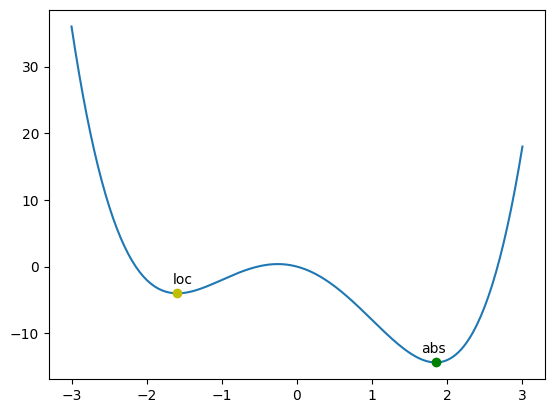

In [2]:
x = np.linspace(-3, 3, 240)
y = (x**4) - (6 * x**2) - (3 * x)

plt.plot(x, y)

# insert local minima
plt.plot([-1.59], [-4], 'yo')
plt.text(-1.65, -3, 'loc', va='bottom')

# insert absolute minima
plt.plot([1.85], [-14.37], 'go')
plt.text(1.65, -13.37, 'abs', va='bottom')

### Computing $\nabla E_{\text{IN}}$

We now have a theoretical basis on how to get to the local minimum. The problem is that we just have some data points $X$, a label vector $y$ and a weight vector $w$ (see [dataset-guide.ipynb](../dataset-guide.ipynb) for a better understanding). How can we compute the gradient of the in-sample error function $\nabla E_{\text{IN}}$? Let's start from the initial formula:
$$
E_{\text{IN}}(w) =  \frac{1}{N}\sum_{i = 0}^N \left( y_i - w^TX_i \right)^2
$$

Let's derive this formula on a single weight component, $w_j$:
$$
\begin{align*}
\frac{\partial}{\partial w_j}E_{\text{IN}} &= \frac{\partial}{\partial w_j}\left[\frac{1}{N}\sum_{i = 0}^N \left( y_i - w^TX_i \right)^2\right] \\
&= \boxed{\frac{2}{N}\sum_{i = 0}^N \left( y_i - w^TX_i \right)\left( -X_i^j \right)}
\end{align*}
$$

Can we rewrite this formula in a matrix closed form? The $w^TX_i$ a single value
$$
w^TX_i = 
\begin{bmatrix}
w_1 &  \dots & w_d
\end{bmatrix} ^ T 
\begin{bmatrix}
X_i^1 & \dots & X_i^d
\end{bmatrix}
= (1\times d) \cdot (d\times 1) = 1\times1
$$

Consequently $w^TX$ is a $(N\times 1)$ vector because $(N\times d) \cdot (d\times1) = d\times 1$. This is compatible when subtracting with $y_i$, which in the matrix form is just a $(N\times1)$ vector. At this point, we now know that:
$$
\sum_{i = 0}^N \left( y_i - w^TX_i \right) = y - w^TX \hspace{20px}(N\times1)
$$

The problem is that we need to transform into a matrix from also $\sum_i \left( -X_i^j \right)$. This notation suggests using the transpose of the matrix $X$, $X^T$, which is a $d\times N$ matrix and the dimension multiplication confirms the correctness. Note that our goal is to get some sort of correction of the weight vector $w$, so the output of $\nabla E_\text{IN}$ should be a $(d\times1)$ vector:
$$
\begin{align*}
\frac{2}{N}\sum_{i = 0}^N \left( y_i - w^TX_i \right)\left( -X_i^j \right) &= \boxed{-X^T(y - w^TX)} \\
&= (d\times N) \cdot (N\times1) = (d\times1)
\end{align*}
$$

### Update rule

We now have all the tools needed to write the update rule in a closed-form solution:
$$
\begin{align*}

w_\text{NEW} &= w_\text{OLD} - \eta\nabla E_{\text{IN}}(w) \\
&= w_\text{OLD} - \eta (-X^T)(y - w^TX) \\
&= w_\text{OLD} + \boxed{\eta X^T(y - w^TX)}
\end{align*}
$$


### Visualizing the GD

In this section, we visualize how the GD reaches the minimum of an error function. The code shown below is used just for visualization purposes, even though it seems like an implementation of the Gradient Descent algorithm, the actual implementation is shown in the [following section](#implementation).

By observing the plot below we can indeed see that the behavior of the GD is somewhat like a marble. We can see that the more steep the curve is (the higher the gradient is) the bigger the jumps are. In the plot, we can see the problem of the local minima, from a purely graphical perspective.

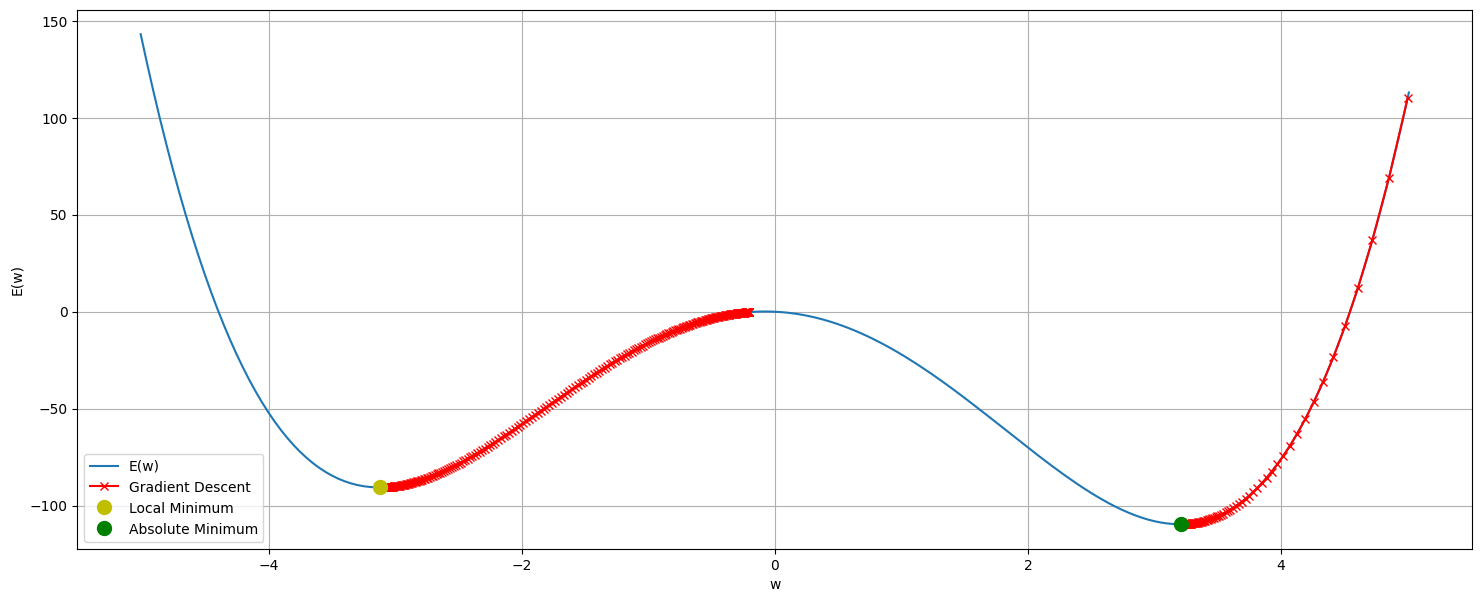

In [3]:
# function and its derivative
def f(x):
    return (x**4) - (20 * x**2) - (3 * x)

def df(x):
    return 4 * (x ** 3) - 40 * x - 3

# gradient descent plotting function
def gradient_descent(x_init, learning_rate, num_iters):
    x_history = [x_init]
    for i in range(num_iters):
        x = x_history[-1]
        x_new = x - learning_rate * df(x)
        x_history.append(x_new)
    return x_history

# initial parameters
learning_rate = 5e-4
num_iters = 100

# first plot
plt.figure(figsize=(18, 7))

# plot the error function 
x_vals = np.linspace(-5.01, 5.01, 200)
plt.plot(x_vals, f(x_vals), label='E(w)')



# GD for local minimum
x_init = -0.2
x_history = gradient_descent(x_init, learning_rate, 3 * num_iters)
plt.plot(x_history, [f(x) for x in x_history], 'rx-', label='Gradient Descent')

# insert local minima
min = x_history[-1]
plt.plot(min, f(min), 'yo', markersize=10, label='Local Minimum')



# GD for absolute minima
x_init = 5
x_history = gradient_descent(x_init, learning_rate, num_iters)
plt.plot(x_history, [f(x) for x in x_history], 'rx-')

# insert absolute minima
min = x_history[-1]
plt.plot(min, f(min), 'go', markersize=10, label='Absolute Minimum')


# general settings
plt.xlabel('w')
plt.ylabel('E(w)')
plt.legend()
plt.grid()

# Implementation

The initial setup of this algorithm is nearly identical to other notebooks' initial setup. The comments provided on the Python code should be auto-explanatory, but you can see the [PLA-basic notebook](https://github.com/imAlessas/neural-networks/blob/main/algorithms/perceptron/PLA-basic.ipynb) where you can find the _initial setup_ properly explained. If you have any other doubts about the procedure, do not hesitate to read the [dataset-guide.ipynb](../dataset-guide.ipynb) notebook.

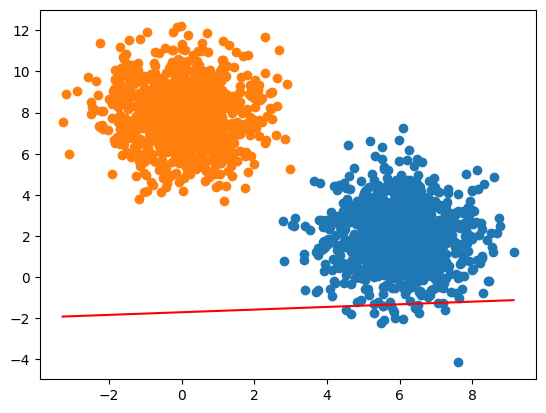

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(314)

# generate N samples per class
N = 1000


# feature 1 and 2 for class 1
X1_1 = np.random.normal(loc = 6, scale = 1, size = N)
X1_2 = np.random.normal(loc = 2, scale = 1.5, size=N)

# generate class 1 labels
Y1 = np.ones(N)

# plot class 1
plt.scatter(X1_1, X1_2)


# second components of X1 and X2
X2_1 = np.random.normal(loc = 0, scale = 1, size = N)
X2_2 = np.random.normal(loc = 8, scale = 1.5, size = N)

# generate class 2 labels
Y2 = -np.ones(N)

# plot class 2
plt.scatter(X2_1, X2_2)


# generates weight 
w = np.random.normal(loc=0.1, size=3)

# plot the initial hyperplane
plt.plot([np.min(X2_1), np.max(X1_1)],
        [np.min(X2_1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X2_1) * (-w[1]/w[2]) - w[0]/w[2]],
        color = 'red')


# generate bias feature
X0 = np.ones(N * 2)

# create feature 1 and 2
X1 = np.concatenate((X1_1, X2_1))
X2 = np.concatenate((X1_2, X2_2))

# create dataset
X = np.stack((X0, X1, X2), axis=1)

# create label vector
y = np.concatenate((Y1, Y2))


### Error function

In this case, the error function is the mathematical definition of the _Sum Squared Error_ which translates into the following mathematical summation:

$$
    \frac{1}{2}\sum_{i = 1}^N(\text{e}_i)^2
$$

In [5]:
def error_sse(errors):
    error = np.sum(np.square(errors)) / 2
    return error

### Training script

Before entering the loop to train the model we set the learning rate $\eta$, and then we initialize the variables <tt>current_epoch</tt> - which counts the iterations - and <tt>max_epochs</tt> - which is the maximum number of iterations allowed. Then we initialize the array <tt>squared_errors_epoch</tt> which stores for every epoch the sum of squared errors (SSE).

In [6]:
# learning rate
eta = 1e-4

# epochs
max_epochs = 1000
current_epoch = 0

# sum of squared errors per epoch
squared_errors_epoch = np.zeros(max_epochs)

We start iterating until we reach the maximum number of epochs, we compute the <tt>output</tt> of the __activation function__, which in this case is the identity function:
$$
    h(X) = \Phi(X) = w^TX
$$
Secondly, we compute the error as the difference between the <tt>output</tt> and the labels $y$ and we use it to save the sum of squared errors.

Then the weight vector $w$ is updated using the following rule (see [computing the gradient$](#computing) and [update rule](#update-rule)):
$$
    w_\text{NEW} \hspace{5px}=\hspace{5px} w_\text{OLD} + \eta X^T(y - w^TX) \hspace{5px}=\hspace{5px} w_\text{OLD} + \eta X^T(y - X\,w)
$$

In [7]:
while (current_epoch < max_epochs):
        
    # compute current output
    output = np.dot(X, w)
    
    # compute error for each data point = y - (Xw)
    errors = y - output
    
    # save SSE of the current epoch
    squared_errors_epoch[current_epoch] = error_sse(errors)
    
    # update the weight with the learning rule
    w += (2 / X.shape[0]) * eta * np.dot( np.transpose(X), errors )
        
    current_epoch += 1

After computing the algorithm we can plot the solution found. We can observe that most of the points are correctly classified while the minority (some units) are still misclassified: when the model gets close to the solution, the hyperplane is increasingly harder to properly rotate due to the fact that the gradient is extremely close to zero.

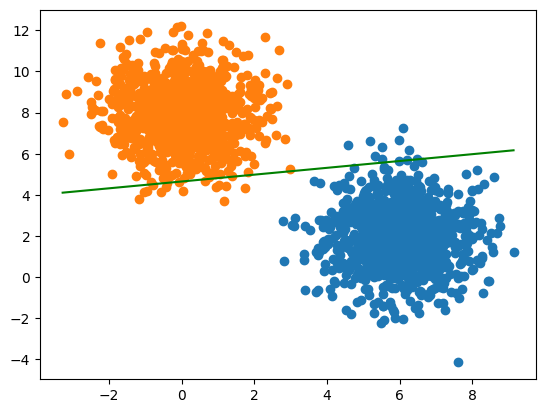

In [8]:
# displays the points
plt.scatter(X1_1, X1_2)
plt.scatter(X2_1, X2_2)

# plots the hyperplane
plt.plot([np.min(X1), np.max(X1)],
         [np.min(X1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1) * (-w[1]/w[2]) - w[0]/w[2]],
         color = 'green')

By plotting the Sum of Squared Errors we can see that initially, the error drop is significant and then it almost constant eve though there are still some misclassified objects.

[160.07691103 160.04239743 160.00811092 159.97404991 159.94021286
 159.90659822 159.87320445 159.84003002 159.80707343 159.77433317]


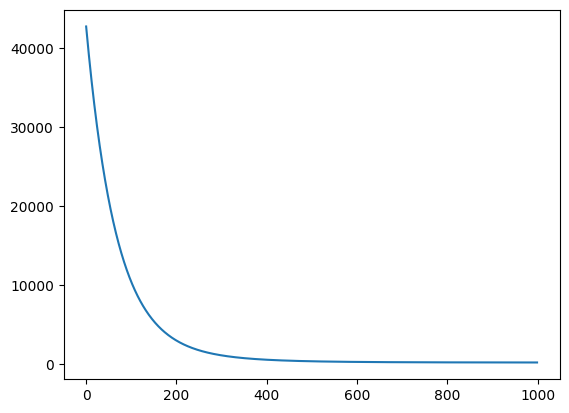

In [9]:
print(squared_errors_epoch[-10:])

# plots the errors
plt.figure()
plt.plot(range(max_epochs), squared_errors_epoch)